R =  -(1/2 + sqrt(2)/2)*(1 - sqrt(2))*exp(sqrt(2)*t) - (1/2 - sqrt(2)/2)*(1 + sqrt(2))*exp(-sqrt(2)*t)
J =  (1/2 + sqrt(2)/2)*exp(sqrt(2)*t) + (1/2 - sqrt(2)/2)*exp(-sqrt(2)*t)


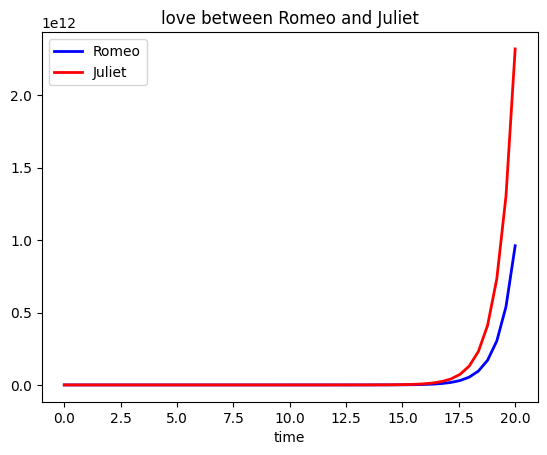

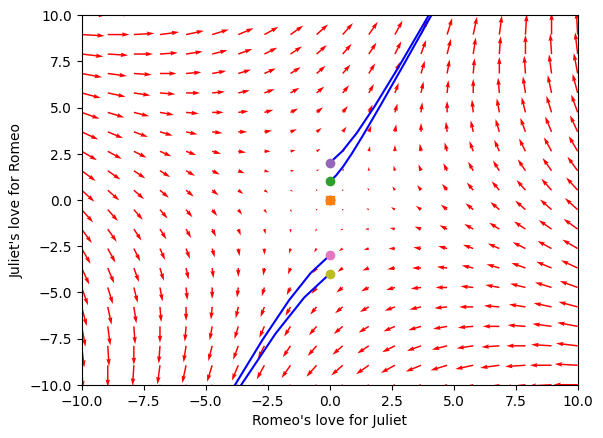

In [3]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, Function, Derivative, Eq, dsolve, solve
# a = int(input("a = "))
# b = int(input("b = "))
# c = int(input("c = "))
# d = int(input("d = "))
# r0 = int(input("r0 = "))
# j0 = int(input("j0 = "))

a = -1
b = 1
c = 1
d = 1
r0 = 1
j0 = 1

t = Symbol('t')
r = Function('r')(t)
j = Function('j')(t)
deq1 = Eq(Derivative(r), a*r + b*j)
deq2 = Eq (Derivative(j), c*r + d*j)
system = (deq1, deq2)
s = dsolve(system)
eq1 = s[0].rhs.subs(t,0) - r0
eq2 = s[1].rhs.subs(t,0) - j0
constants = solve([eq1, eq2])
r = s[0].subs(constants)
j = s[1].subs(constants)
r = r.rhs
j = j.rhs
print("R = ", r)
print("J = ", j)


def love(y, t):
    
    R = y[0]
    J = y[1]
    dRdt = a*R+b*J
    dJdt = c*R+d*J
    return [dRdt ,dJdt]

t = np.linspace(0,20)
y0= [r0, j0]

y = odeint(love,y0,t)



plt.plot(t,y[:,0], 'b-', linewidth = 2.0)
plt.plot(t,y[:,1],'r-', linewidth=2.0)
plt.xlabel("time")
# plt.ylabel("y[R,J]")
plt.title("love between Romeo and Juliet")
plt.legend(["Romeo","Juliet"])
# plt.xlim([0, 20])
# plt.ylim([-100, 100])
plt.savefig('images/plot.png')
plt.show()

y1 = np.linspace(-10, 10, 20)
y2 = np.linspace(-10, 10, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = love([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('Romeo\'s love for Juliet')
plt.ylabel('Juliet\'s love for Romeo')
plt.xlim([-10, 10])
plt.ylim([-10, 10])


for y20 in [0, 1, 2, -3, -4]:
    tspan = np.linspace(0, 50, 200)
    y0 = [0, y20]
    ys = odeint(love, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    

plt.savefig('images/phase-portrait-2.png')
plt.show()

The system has a fixed point in 0,0
[(-c, -c/(c - 1))]


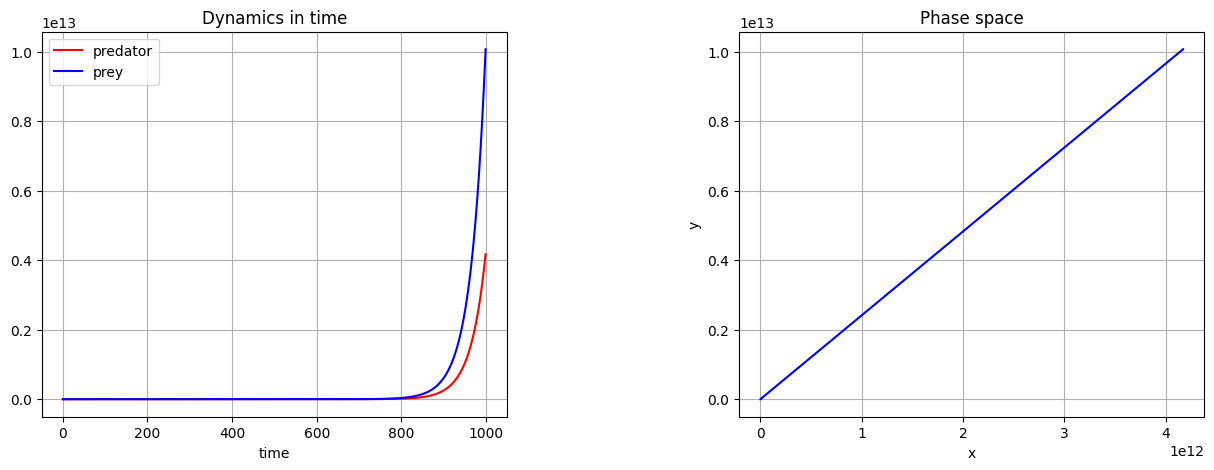

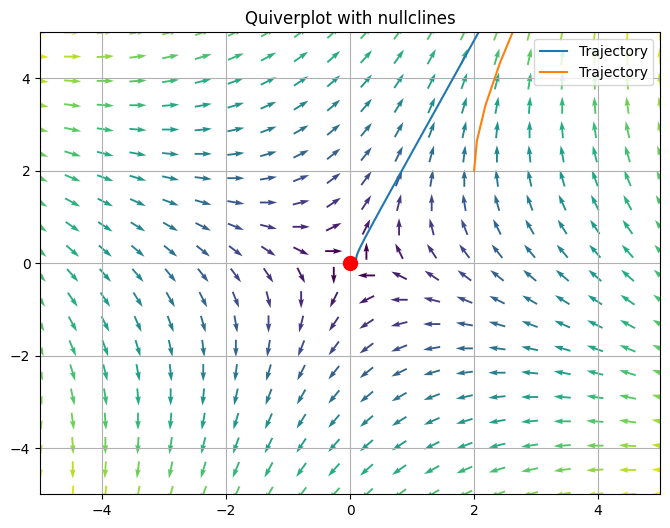

In [9]:
# import necessary libraries
import matplotlib.pyplot as plt
# show plots in notebook
import sympy as sm
from sympy import Symbol, Function, Derivative, Eq, dsolve, solve

a = -1
b = 1
c = 1
d = 1
r0 = 1
j0 = 1

# define system in terms of separated differential equations
def f(x,y):
    return a*x+b*y
def g(x,y):
    return c*x+d*y

# initialize lists containing values
x = []
y = []

import numpy as np
from scipy import integrate

# define system in terms of a Numpy array
def Sys(X, t=0):
    # here X[0] = x and x[1] = y    
    return np.array([ a*X[0] +b* X[1] , c*X[0] + d*X[1] ])

# generate 1000 linearly spaced numbers for x-axes
t = np.linspace(0, 20,  1000)
# initial values: x0 = 10, y0 = 2
Sys0 = np.array([10, 2])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
# infodict['message']                      # integration successful

x,y = X.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x, 'r-', label='predator')
ax1.plot(y, 'b-', label='prey')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("x")
ax2.set_ylabel("y")  
ax2.set_title("Phase space")
ax2.grid()

# brute force: iterate through possibility space (r)
fp = []

def find_fixed_points(r):
    for x in range(r):
        for y in range(r):
            if ((f(x,y) == 0) and (g(x,y) == 0)):
                fp.append((x,y))
                print('The system has a fixed point in %s,%s' % (x,y))
    return fp

find_fixed_points(10)

r, c1 = sm.symbols('r, c', negative=False)
R = a*r - b+c1
C = c*r + d*c1

# use sympy's way of setting equations to zero
REqual = sm.Eq(R, 0)
CEqual = sm.Eq(C, 0)

# compute fixed points
equilibria = sm.solve( (REqual, CEqual), r, c )
print(equilibria)

EQ = [1 , 1]

#plot
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

x = np.linspace(0,2,20)
y = np.arange(0,2,20)

# # plot nullclines
# ax4.plot([0,2],[0,2], 'r--', lw=0.5, label='x-nullcline')
# ax4.plot([0,2],[0,2], 'b--', lw=0.5, label='y-nullcline')

values = np.linspace(0.1, 2, 2)
t = np.linspace(0, 150, 1000)
for v in values:
    # Starting point of each trajectory
    P0 = [E*v for E in EQ]
    # Integrate system of ODEs to get x and y values
    P = integrate.odeint(Sys, P0, t)
    # Plot each trajectory
    ax4.plot( P[:,0], P[:,1],        
            # Assign starting point to trajectory label
            label='Trajectory' )


# plot fixed points
for point in fp:
    ax4.plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
ax4.set_title("Quiverplot with nullclines")
ax4.legend(loc='best')

# quiverplot
# define a grid and compute direction at each point
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

ax4.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
ax4.set_xlim(-5,5)
ax4.set_ylim(-5,5)
ax4.legend()
ax4.grid()